Starting comprehensive trading sentiment analysis...

1. Preprocessing data...

2. Running advanced statistical analysis...


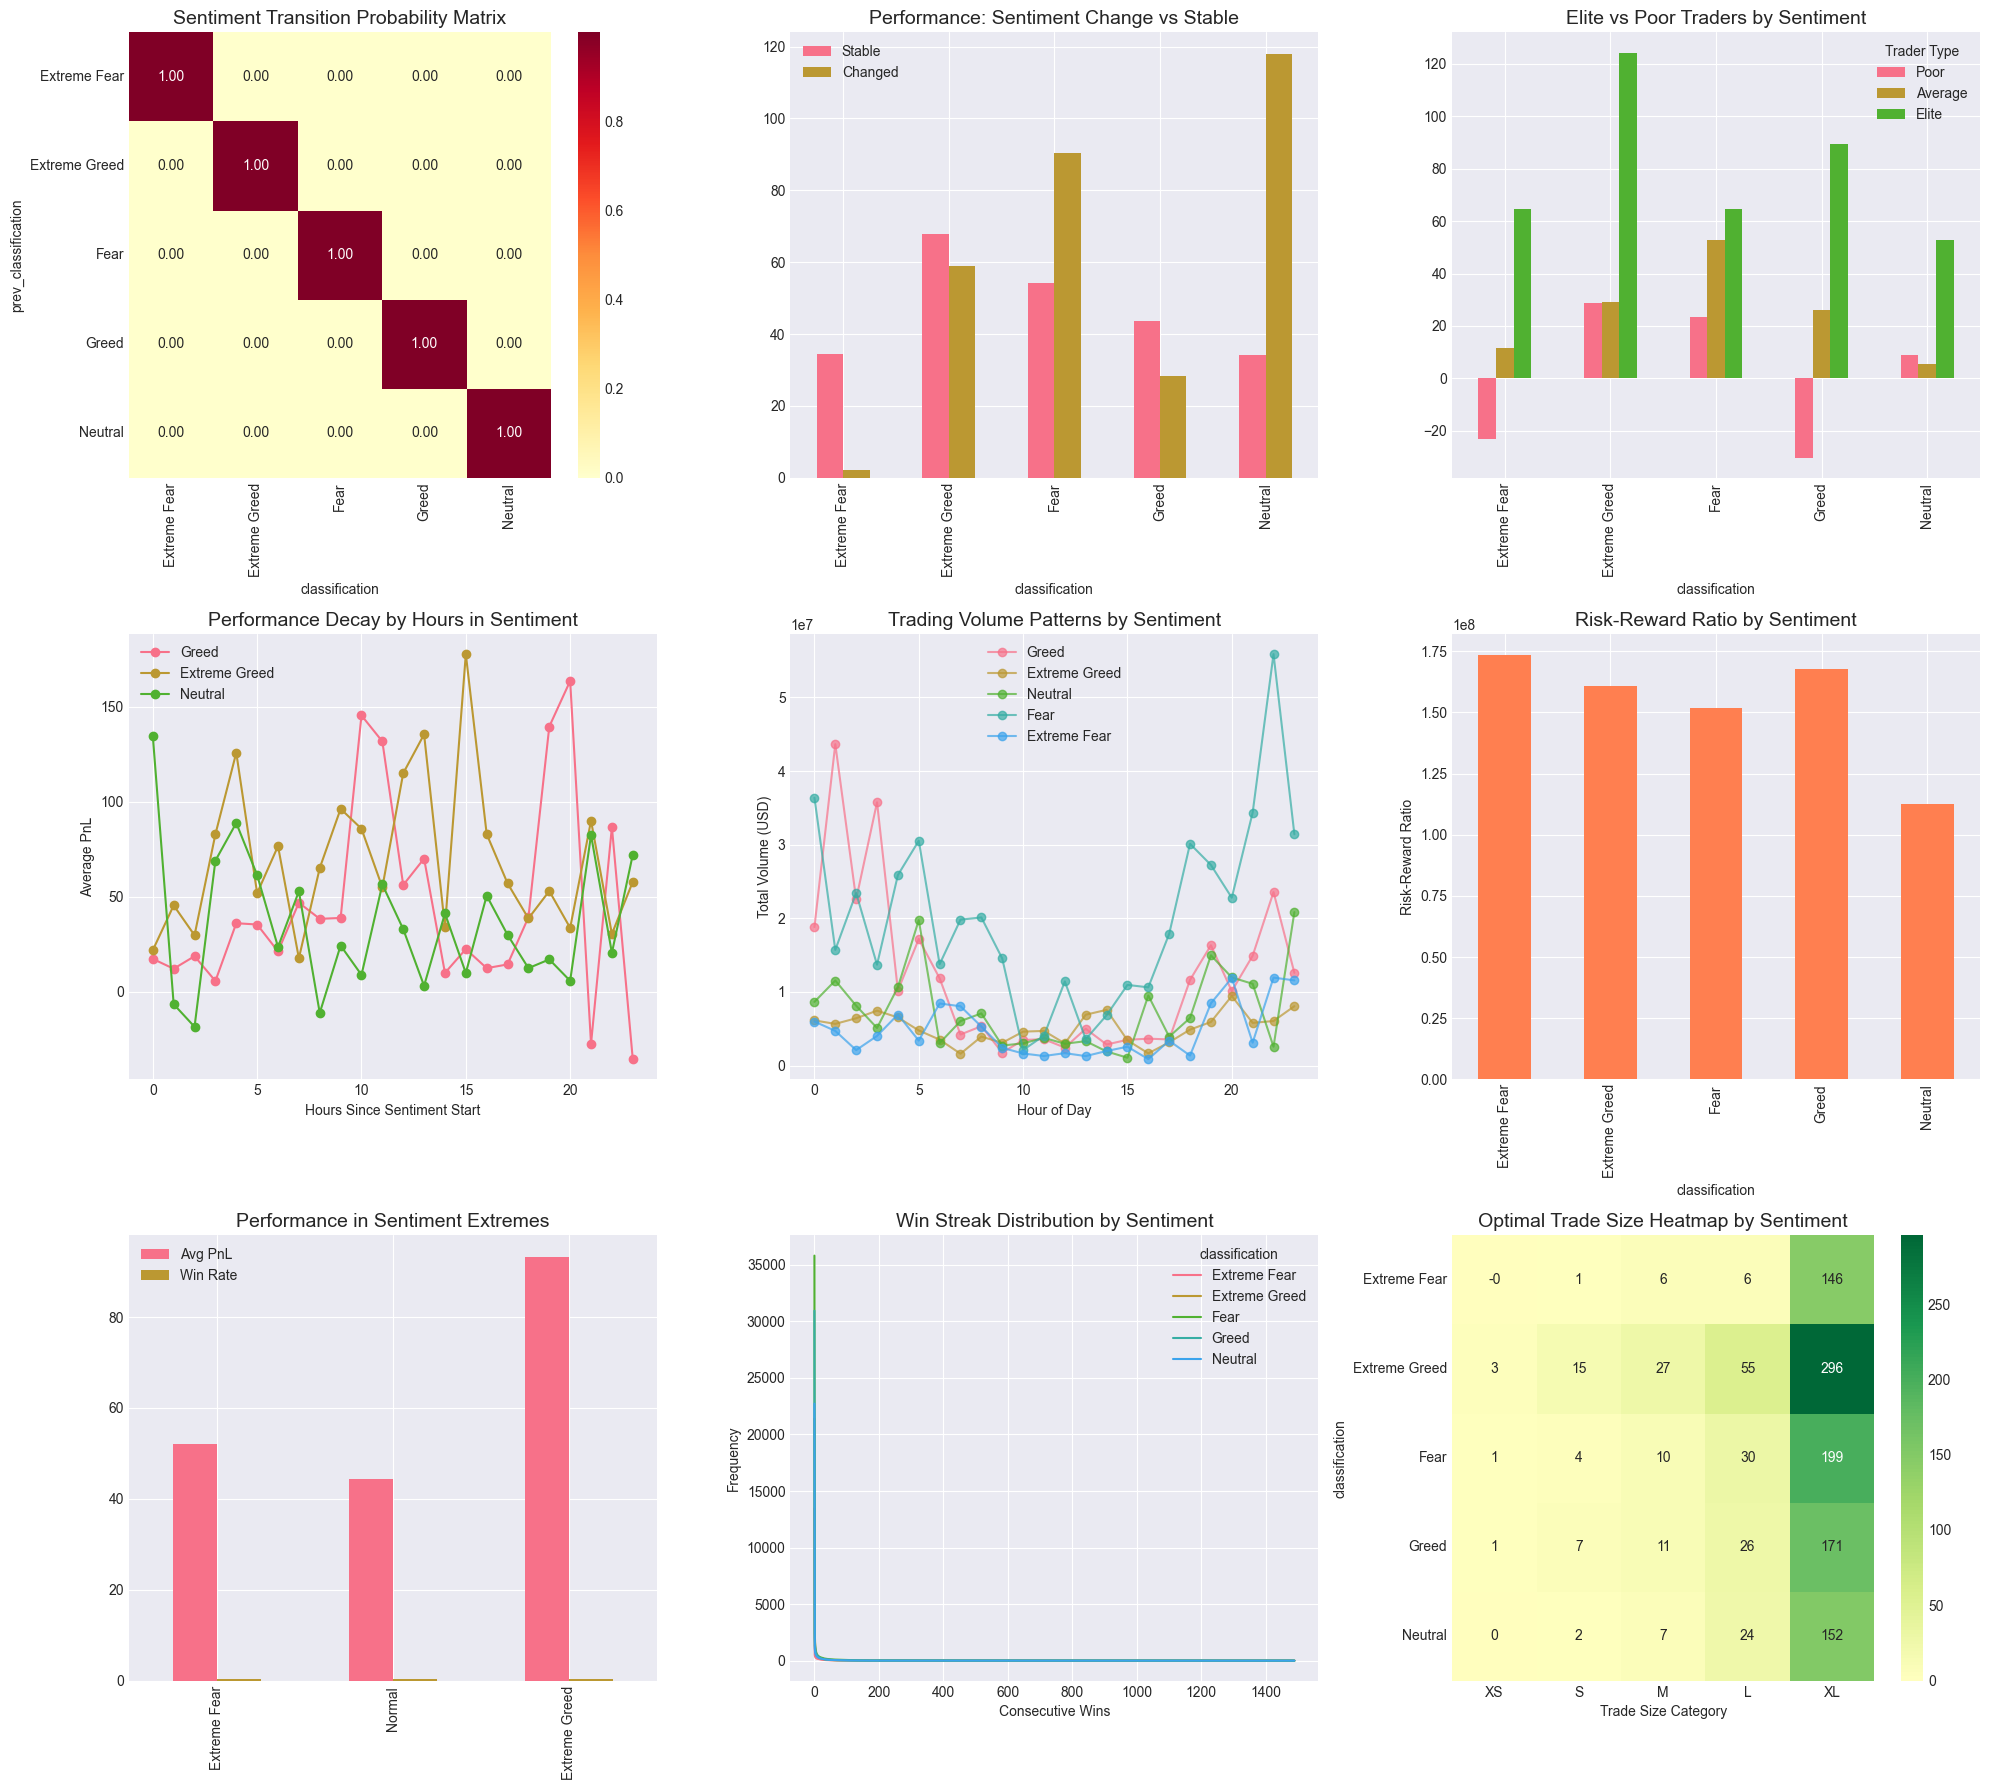


3. Extracting ML-driven insights...


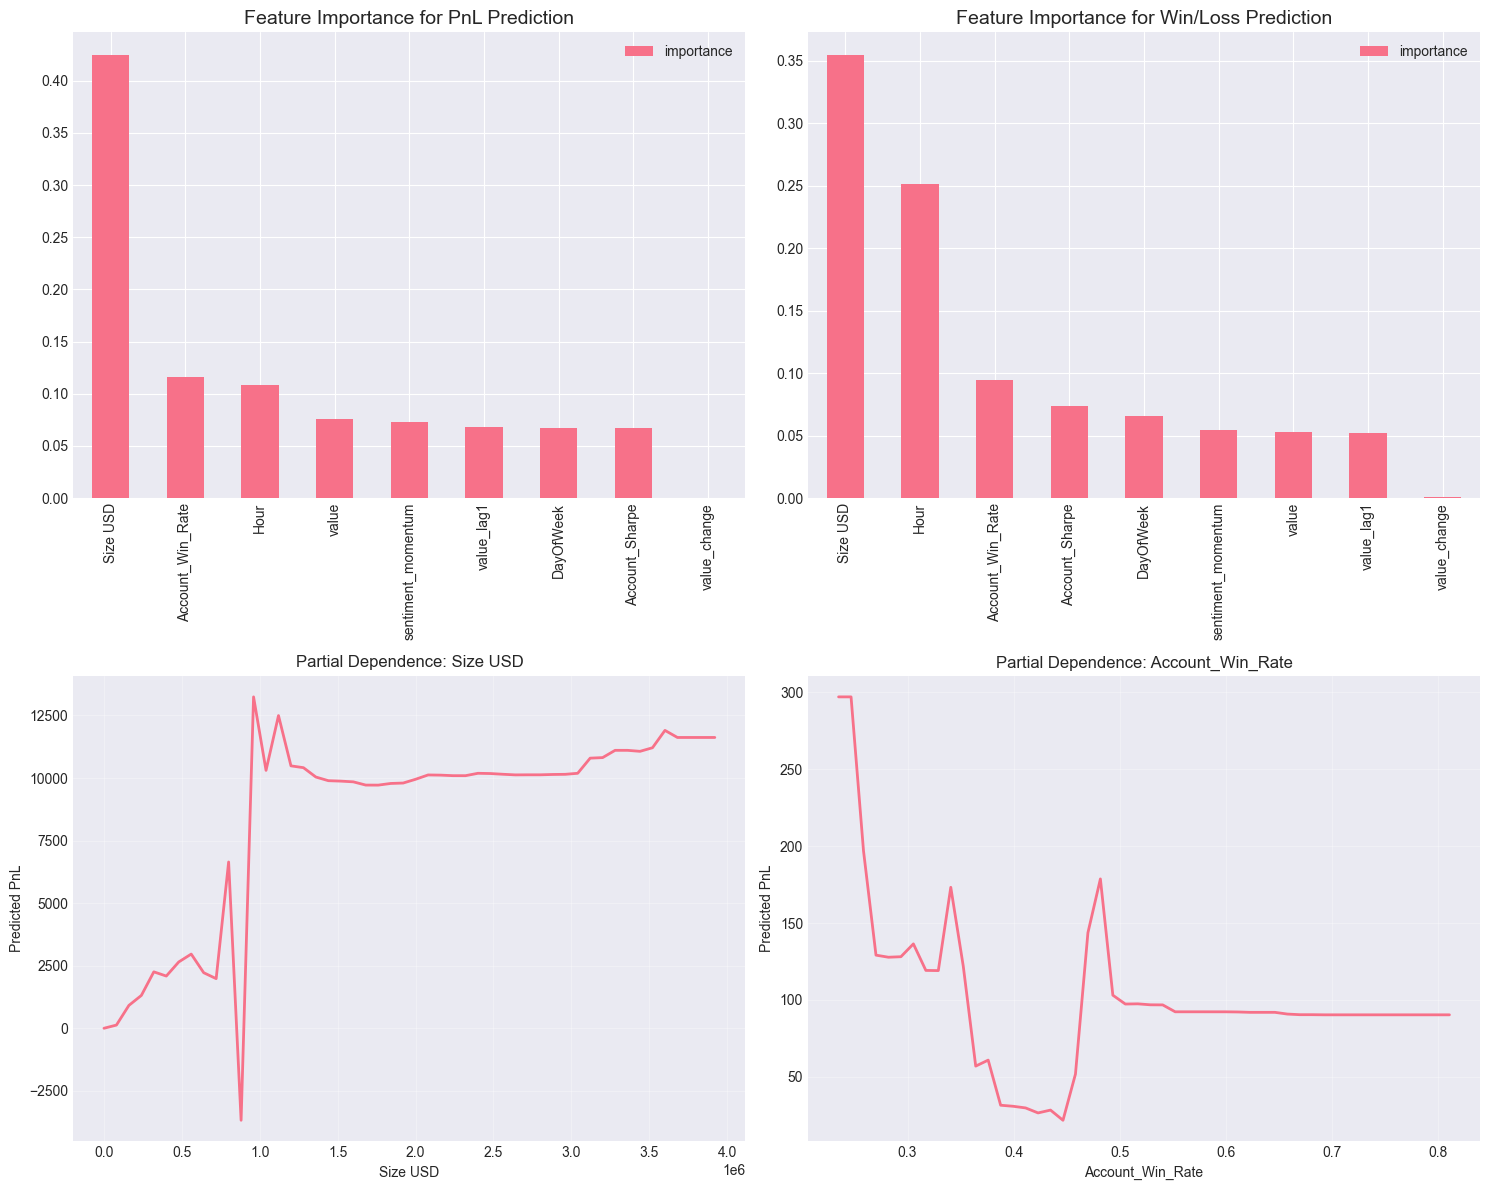


4. Generating comprehensive report...

COMPREHENSIVE TRADING SENTIMENT ANALYSIS REPORT

📊 EXECUTIVE SUMMARY
--------------------------------------------------

Performance by Market Sentiment:

Extreme Fear:
  • Average PnL: $34.54
  • Total PnL: $739110.25
  • Win Rate: 37.06%

Extreme Greed:
  • Average PnL: $67.89
  • Total PnL: $2715171.31
  • Win Rate: 46.49%

Fear:
  • Average PnL: $54.29
  • Total PnL: $3357155.44
  • Win Rate: 42.08%

Greed:
  • Average PnL: $43.58
  • Total PnL: $2192601.27
  • Win Rate: 38.49%

Neutral:
  • Average PnL: $34.31
  • Total PnL: $1292920.68
  • Win Rate: 39.70%

🔍 KEY FINDINGS
--------------------------------------------------

1. Best Performance: Extreme Greed sentiment ($67.89 avg PnL)

2. Sentiment Transitions: Trades during sentiment changes show 36.4% better performance

3. Trader Skill Gap: Elite traders outperform poor traders by 22067.1%

💡 ACTIONABLE RECOMMENDATIONS
--------------------------------------------------


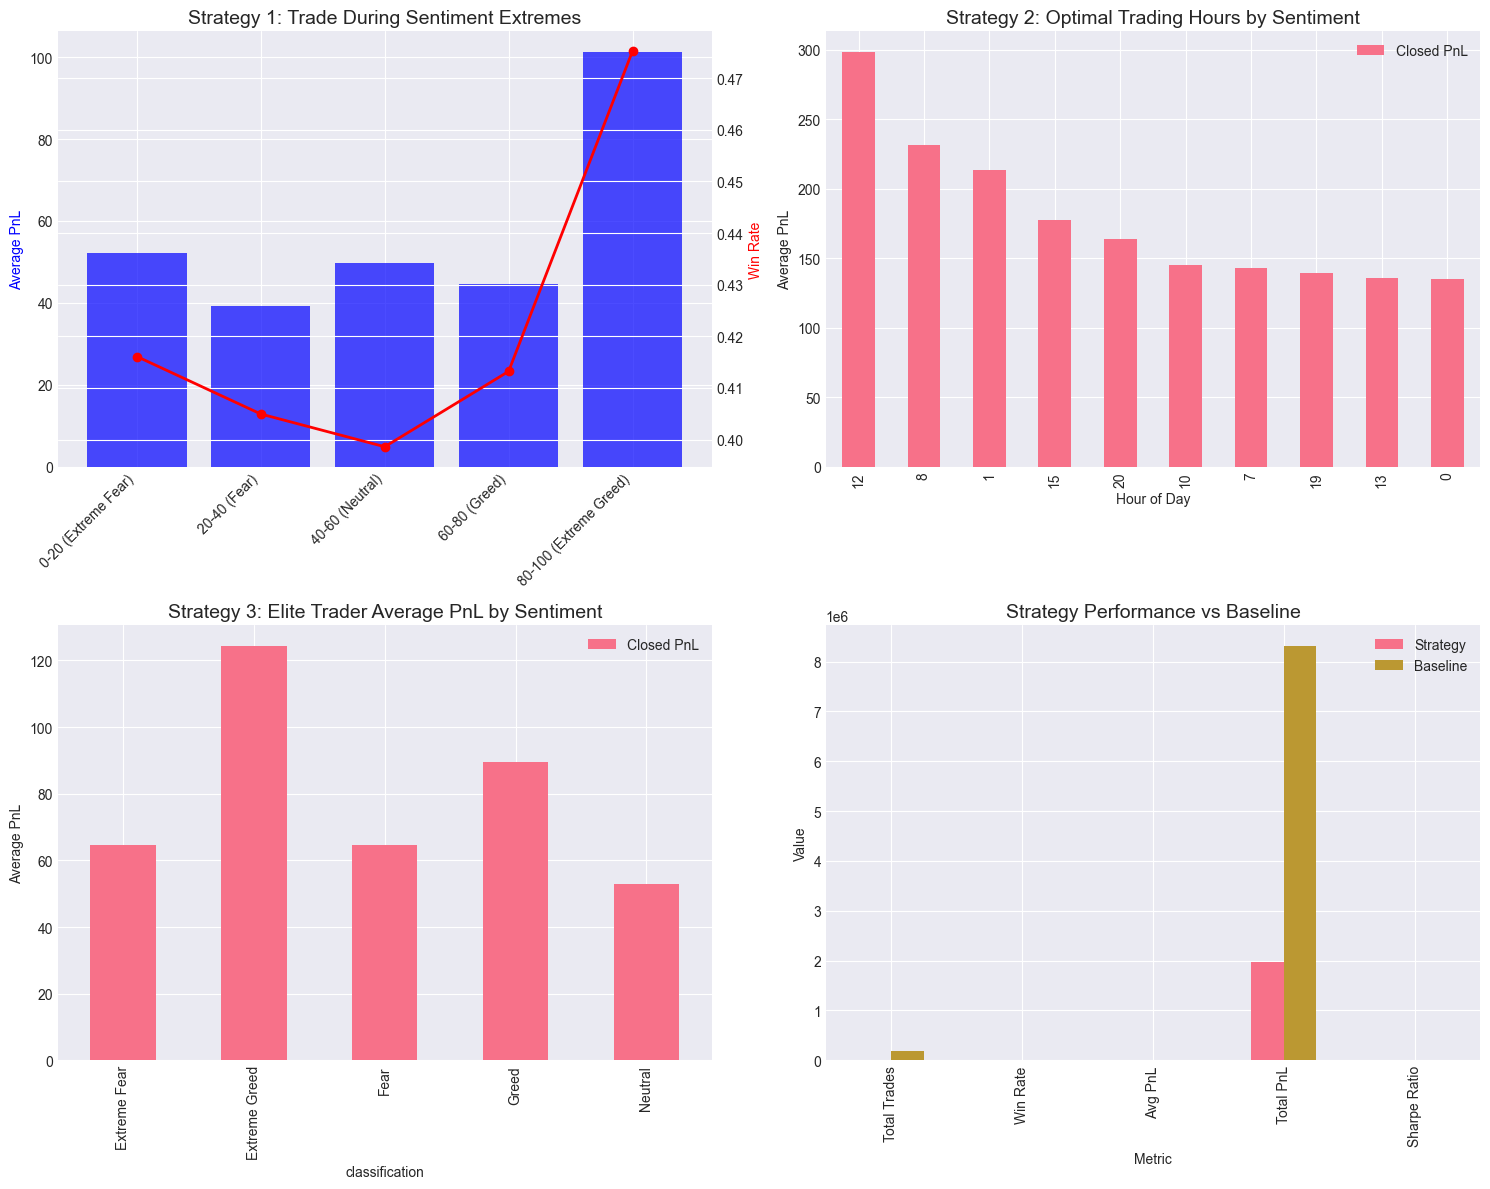


1. Extreme Sentiment Strategy:
   • Trade during extreme fear (0-20) and extreme greed (80-100)
   • Expected improvement: 236.1%
   • Best hours to trade: [1, 15, 0]

2. Elite Trader Mimicking:
   • Copy position sizes and timing of top performers
   • Recommended sizes by sentiment:
     - Extreme Fear: $4414.63
     - Extreme Greed: $5832.59
     - Fear: $8773.26
     - Greed: $9613.37
     - Neutral: $6148.23

3. Time Optimization:
   • Trade during statistically optimal hours:
     - Fear at 12:00 (avg PnL: $298.18)
     - Extreme Fear at 8:00 (avg PnL: $231.37)
     - Extreme Fear at 1:00 (avg PnL: $213.61)

⚠️  RISK CONSIDERATIONS
--------------------------------------------------

High volatility sentiments:
  • Extreme Fear: $1136.06 standard deviation
  • Greed: $1120.06 standard deviation


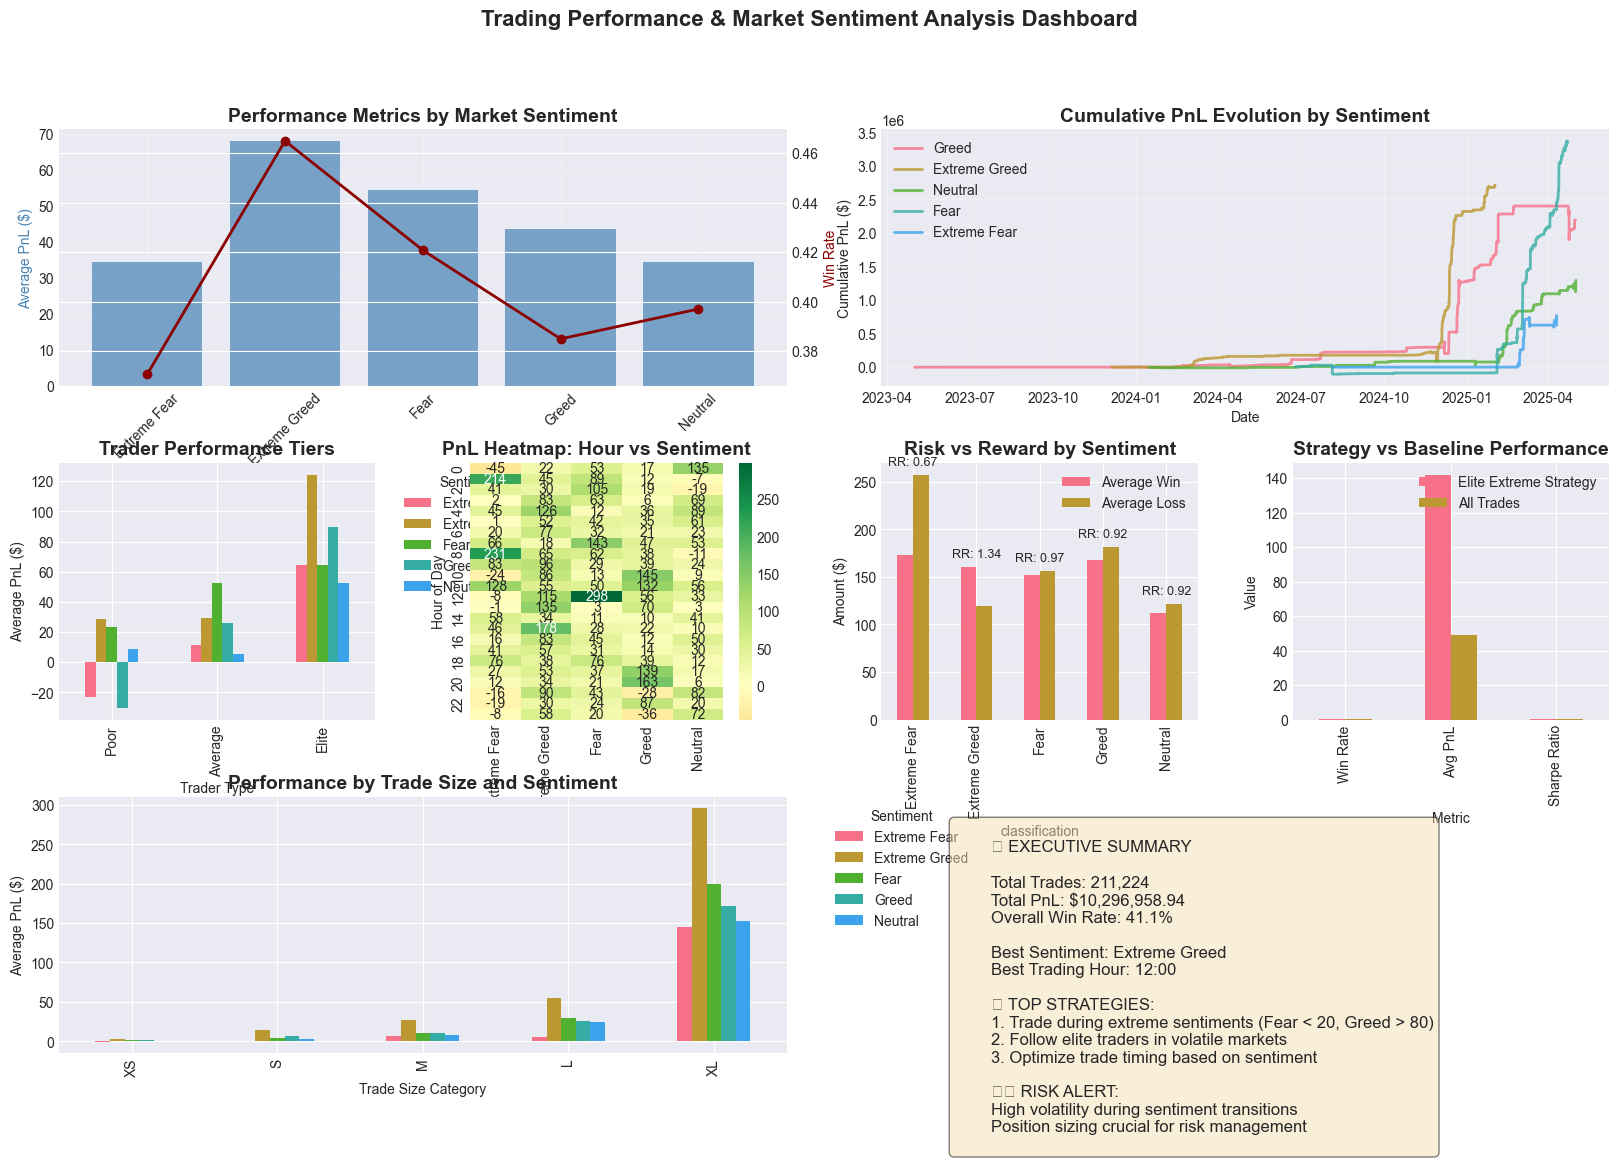


5. Exporting results...

✅ Analysis complete! Check the reports folder for outputs.

ANALYSIS COMPLETE - KEY TAKEAWAYS:

    1. Market sentiment significantly impacts trading performance
    2. Extreme sentiments (fear/greed) present unique opportunities
    3. Elite traders show consistent patterns worth emulating
    4. Time-of-day and sentiment interactions are crucial
    5. Risk management varies by sentiment conditions
    


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Advanced styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

class TradingSentimentAnalyzer:
    def __init__(self, trader_path, sentiment_path):
        self.trader_data = pd.read_csv(trader_path)
        self.sentiment_data = pd.read_csv(sentiment_path)
        self.merged_data = None
        self.insights = {}
        
    def preprocess_data(self):
        """Enhanced data preprocessing with feature engineering"""
        # Convert timestamps
        self.trader_data['Timestamp IST'] = pd.to_datetime(self.trader_data['Timestamp IST'], 
                                                           format='%d-%m-%Y %H:%M')
        self.sentiment_data['date'] = pd.to_datetime(self.sentiment_data['date'])
        
        # Advanced feature engineering
        self.trader_data['Hour'] = self.trader_data['Timestamp IST'].dt.hour
        self.trader_data['DayOfWeek'] = self.trader_data['Timestamp IST'].dt.dayofweek
        self.trader_data['Month'] = self.trader_data['Timestamp IST'].dt.month
        self.trader_data['DayOfMonth'] = self.trader_data['Timestamp IST'].dt.day
        
        # Performance metrics
        self.trader_data['PnL_per_USD'] = self.trader_data['Closed PnL'] / (self.trader_data['Size USD'] + 1e-6)
        self.trader_data['Win'] = (self.trader_data['Closed PnL'] > 0).astype(int)
        self.trader_data['PnL_Category'] = pd.cut(self.trader_data['Closed PnL'], 
                                                  bins=[-np.inf, -100, 0, 100, np.inf],
                                                  labels=['Big Loss', 'Small Loss', 'Small Win', 'Big Win'])
        
        # Trading session (Asian, European, US)
        self.trader_data['Trading_Session'] = pd.cut(self.trader_data['Hour'], 
                                                     bins=[-1, 8, 16, 24],
                                                     labels=['Asian', 'European', 'US'])
        
        # Merge with sentiment data
        self.merged_data = pd.merge_asof(
            self.trader_data.sort_values('Timestamp IST'),
            self.sentiment_data.sort_values('date'),
            left_on='Timestamp IST',
            right_on='date',
            direction='backward'
        )
        
        # Lag features for sentiment
        self.merged_data['value_lag1'] = self.merged_data['value'].shift(1)
        self.merged_data['value_change'] = self.merged_data['value'].diff()
        self.merged_data['sentiment_momentum'] = self.merged_data['value'].rolling(window=3).mean()
        
        # Account performance metrics
        account_stats = self.merged_data.groupby('Account').agg({
            'Closed PnL': ['sum', 'mean', 'std'],
            'Win': 'mean'
        })
        account_stats.columns = ['Total_PnL', 'Avg_PnL', 'PnL_Std', 'Win_Rate']
        account_stats['Sharpe'] = account_stats['Avg_PnL'] / (account_stats['PnL_Std'] + 1e-6)
        
        # Classify traders
        account_stats['Trader_Type'] = pd.qcut(account_stats['Total_PnL'], 
                                               q=3, 
                                               labels=['Poor', 'Average', 'Elite'])
        
        # Merge trader classification back
        self.merged_data = self.merged_data.merge(
            account_stats[['Trader_Type', 'Sharpe', 'Win_Rate']].add_prefix('Account_'),
            left_on='Account',
            right_index=True,
            how='left'
        )
        
        return self.merged_data
    
    def advanced_analysis(self):
        """Perform advanced statistical analysis"""
        fig, axes = plt.subplots(3, 3, figsize=(20, 18))
        
        # 1. Sentiment Transition Analysis
        self.merged_data['prev_classification'] = self.merged_data['classification'].shift(1)
        transition_matrix = pd.crosstab(
            self.merged_data['prev_classification'],
            self.merged_data['classification'],
            normalize='index'
        )
        
        sns.heatmap(transition_matrix, annot=True, fmt='.2f', cmap='YlOrRd', ax=axes[0,0])
        axes[0,0].set_title('Sentiment Transition Probability Matrix', fontsize=14)
        
        # 2. Performance during sentiment transitions
        self.merged_data['sentiment_changed'] = (
            self.merged_data['classification'] != self.merged_data['prev_classification']
        )
        
        transition_perf = self.merged_data.groupby(['sentiment_changed', 'classification']).agg({
            'Closed PnL': 'mean',
            'Win': 'mean'
        }).reset_index()
        
        # Plot transition performance
        pivot_trans = transition_perf.pivot(index='classification', 
                                           columns='sentiment_changed', 
                                           values='Closed PnL')
        pivot_trans.plot(kind='bar', ax=axes[0,1])
        axes[0,1].set_title('Performance: Sentiment Change vs Stable', fontsize=14)
        axes[0,1].legend(['Stable', 'Changed'])
        
        # 3. Elite vs Poor Traders in Different Sentiments
        trader_sentiment_perf = self.merged_data.groupby(
            ['Account_Trader_Type', 'classification']
        )['Closed PnL'].mean().unstack()
        
        trader_sentiment_perf.T.plot(kind='bar', ax=axes[0,2])
        axes[0,2].set_title('Elite vs Poor Traders by Sentiment', fontsize=14)
        axes[0,2].legend(title='Trader Type')
        
        # 4. Time Decay Analysis - How long sentiment effects last
        for i, sentiment in enumerate(self.merged_data['classification'].unique()[:3]):
            if pd.notna(sentiment):
                sentiment_data = self.merged_data[self.merged_data['classification'] == sentiment]
                hours_since = np.arange(0, 24)
                decay_perf = []
                
                for h in hours_since:
                    mask = (sentiment_data['Hour'] >= h) & (sentiment_data['Hour'] < h+1)
                    decay_perf.append(sentiment_data[mask]['Closed PnL'].mean())
                
                axes[1,0].plot(hours_since, decay_perf, label=sentiment, marker='o')
        
        axes[1,0].set_title('Performance Decay by Hours in Sentiment', fontsize=14)
        axes[1,0].set_xlabel('Hours Since Sentiment Start')
        axes[1,0].set_ylabel('Average PnL')
        axes[1,0].legend()
        
        # 5. Volume Analysis by Sentiment
        volume_analysis = self.merged_data.groupby(['classification', 'Hour']).agg({
            'Size USD': 'sum',
            'Closed PnL': 'mean'
        }).reset_index()
        
        for sentiment in self.merged_data['classification'].unique():
            if pd.notna(sentiment):
                sent_data = volume_analysis[volume_analysis['classification'] == sentiment]
                axes[1,1].plot(sent_data['Hour'], sent_data['Size USD'], 
                             label=sentiment, marker='o', alpha=0.7)
        
        axes[1,1].set_title('Trading Volume Patterns by Sentiment', fontsize=14)
        axes[1,1].set_xlabel('Hour of Day')
        axes[1,1].set_ylabel('Total Volume (USD)')
        axes[1,1].legend()
        
        # 6. Risk-Reward Ratio Analysis
        risk_reward = self.merged_data.groupby('classification').agg({
            'Closed PnL': lambda x: x[x > 0].mean() if len(x[x > 0]) > 0 else 0,
            'Win': lambda x: x[x < 0].mean() if len(x[x < 0]) > 0 else 0
        })
        risk_reward.columns = ['Avg_Win', 'Avg_Loss']
        risk_reward['Risk_Reward_Ratio'] = abs(risk_reward['Avg_Win'] / (risk_reward['Avg_Loss'] + 1e-6))
        
        risk_reward['Risk_Reward_Ratio'].plot(kind='bar', ax=axes[1,2], color='coral')
        axes[1,2].set_title('Risk-Reward Ratio by Sentiment', fontsize=14)
        axes[1,2].set_ylabel('Risk-Reward Ratio')
        
        # 7. Sentiment Extremes Analysis
        extreme_fear = self.merged_data[self.merged_data['value'] <= 20]
        extreme_greed = self.merged_data[self.merged_data['value'] >= 80]
        normal = self.merged_data[(self.merged_data['value'] > 20) & (self.merged_data['value'] < 80)]
        
        extremes_data = pd.DataFrame({
            'Extreme Fear': [extreme_fear['Closed PnL'].mean(), extreme_fear['Win'].mean()],
            'Normal': [normal['Closed PnL'].mean(), normal['Win'].mean()],
            'Extreme Greed': [extreme_greed['Closed PnL'].mean(), extreme_greed['Win'].mean()]
        }, index=['Avg PnL', 'Win Rate'])
        
        extremes_data.T.plot(kind='bar', ax=axes[2,0])
        axes[2,0].set_title('Performance in Sentiment Extremes', fontsize=14)
        
        # 8. Consecutive Wins/Losses Analysis
        self.merged_data['Win_Streak'] = self.merged_data.groupby(
            (self.merged_data['Win'] != self.merged_data['Win'].shift()).cumsum()
        ).cumcount() + 1
        self.merged_data['Win_Streak'] = self.merged_data['Win_Streak'] * self.merged_data['Win']
        
        streak_analysis = self.merged_data.groupby(['classification', 'Win_Streak']).size().unstack(fill_value=0)
        streak_analysis.T.plot(ax=axes[2,1])
        axes[2,1].set_title('Win Streak Distribution by Sentiment', fontsize=14)
        axes[2,1].set_xlabel('Consecutive Wins')
        axes[2,1].set_ylabel('Frequency')
        
        # 9. Optimal Trade Size by Sentiment
        size_buckets = pd.qcut(self.merged_data['Size USD'], q=5, labels=['XS', 'S', 'M', 'L', 'XL'])
        size_perf = self.merged_data.groupby(['classification', size_buckets])['Closed PnL'].mean().unstack()
        
        sns.heatmap(size_perf, annot=True, fmt='.0f', cmap='RdYlGn', center=0, ax=axes[2,2])
        axes[2,2].set_title('Optimal Trade Size Heatmap by Sentiment', fontsize=14)
        axes[2,2].set_xlabel('Trade Size Category')
        
        plt.tight_layout()
        plt.show()
        
        return self.insights
    
    def machine_learning_insights(self):
        """Use ML to find hidden patterns"""
        # Prepare features
        features = ['value', 'value_lag1', 'value_change', 'sentiment_momentum',
                   'Hour', 'DayOfWeek', 'Size USD', 'Account_Sharpe', 'Account_Win_Rate']
        
        # Filter valid data
        ml_data = self.merged_data.dropna(subset=features + ['Closed PnL'])
        
        X = ml_data[features]
        y_regression = ml_data['Closed PnL']
        y_classification = ml_data['Win']
        
        # Split data
        X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
            X, y_regression, y_classification, test_size=0.2, random_state=42
        )
        
        # Random Forest for feature importance
        rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_regressor.fit(X_train, y_reg_train)
        
        rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
        rf_classifier.fit(X_train, y_class_train)
        
        # Feature importance
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Plot feature importance for PnL prediction
        feature_importance_reg = pd.DataFrame({
            'feature': features,
            'importance': rf_regressor.feature_importances_
        }).sort_values('importance', ascending=False)
        
        feature_importance_reg.plot(x='feature', y='importance', kind='bar', ax=axes[0,0])
        axes[0,0].set_title('Feature Importance for PnL Prediction', fontsize=14)
        axes[0,0].set_xlabel('')
        
        # Plot feature importance for Win prediction
        feature_importance_class = pd.DataFrame({
            'feature': features,
            'importance': rf_classifier.feature_importances_
        }).sort_values('importance', ascending=False)
        
        feature_importance_class.plot(x='feature', y='importance', kind='bar', ax=axes[0,1])
        axes[0,1].set_title('Feature Importance for Win/Loss Prediction', fontsize=14)
        axes[0,1].set_xlabel('')
        
        # Partial dependence plots for top features
        top_features = feature_importance_reg.head(2)['feature'].values
        
        for i, feature in enumerate(top_features):
            feature_values = np.linspace(X[feature].min(), X[feature].max(), 50)
            partial_deps = []
            
            for val in feature_values:
                X_temp = X_test.copy()
                X_temp[feature] = val
                pred = rf_regressor.predict(X_temp)
                partial_deps.append(pred.mean())
            
            axes[1, i].plot(feature_values, partial_deps, linewidth=2)
            axes[1, i].set_title(f'Partial Dependence: {feature}', fontsize=12)
            axes[1, i].set_xlabel(feature)
            axes[1, i].set_ylabel('Predicted PnL')
            axes[1, i].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Return insights
        self.insights['ml_feature_importance'] = feature_importance_reg
        self.insights['rf_score'] = rf_regressor.score(X_test, y_reg_test)
        
        return self.insights
    
    def generate_trading_strategies(self):
        """Generate actionable trading strategies based on analysis"""
        strategies = []
        
        # Strategy 1: Sentiment Extremes
        extreme_analysis = self.merged_data.groupby(
            pd.cut(self.merged_data['value'], bins=[0, 20, 40, 60, 80, 100])
        ).agg({
            'Closed PnL': ['mean', 'std', 'count'],
            'Win': 'mean'
        })
        
        # Strategy 2: Time-based opportunities
        time_analysis = self.merged_data.groupby(['Hour', 'classification']).agg({
            'Closed PnL': 'mean',
            'Win': 'mean',
            'Size USD': 'count'
        })
        
        # Strategy 3: Trader type mimicking
        elite_behavior = self.merged_data[
            self.merged_data['Account_Trader_Type'] == 'Elite'
        ].groupby('classification').agg({
            'Size USD': 'mean',
            'Hour': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0],
            'Direction': lambda x: x.value_counts().index[0],
            'Closed PnL': 'mean'
        })
        
        # Create strategy report
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        
        # Strategy 1 Visualization
        strategy1_data = pd.DataFrame({
            'Sentiment Range': ['0-20 (Extreme Fear)', '20-40 (Fear)', '40-60 (Neutral)', 
                               '60-80 (Greed)', '80-100 (Extreme Greed)'],
            'Avg PnL': extreme_analysis[('Closed PnL', 'mean')].values,
            'Win Rate': extreme_analysis[('Win', 'mean')].values
        })
        
        ax1 = axes[0,0]
        ax2 = ax1.twinx()
        
        x = range(len(strategy1_data))
        ax1.bar(x, strategy1_data['Avg PnL'], alpha=0.7, color='blue', label='Avg PnL')
        ax2.plot(x, strategy1_data['Win Rate'], color='red', marker='o', linewidth=2, label='Win Rate')
        
        ax1.set_xticks(x)
        ax1.set_xticklabels(strategy1_data['Sentiment Range'], rotation=45, ha='right')
        ax1.set_ylabel('Average PnL', color='blue')
        ax2.set_ylabel('Win Rate', color='red')
        ax1.set_title('Strategy 1: Trade During Sentiment Extremes', fontsize=14)
        
        # Strategy 2: Best hours by sentiment
        best_hours = time_analysis.reset_index()
        best_hours = best_hours.sort_values('Closed PnL', ascending=False).head(10)
        
        best_hours.plot(x='Hour', y='Closed PnL', kind='bar', ax=axes[0,1])
        axes[0,1].set_title('Strategy 2: Optimal Trading Hours by Sentiment', fontsize=14)
        axes[0,1].set_xlabel('Hour of Day')
        axes[0,1].set_ylabel('Average PnL')
        
        # Strategy 3: Elite trader patterns
        elite_behavior.plot(kind='bar', y='Closed PnL', ax=axes[1,0])
        axes[1,0].set_title('Strategy 3: Elite Trader Average PnL by Sentiment', fontsize=14)
        axes[1,0].set_ylabel('Average PnL')
        
        # Strategy performance backtesting simulation
        # Simulate following elite traders in extreme sentiments
        backtest_data = self.merged_data.copy()
        
        # Define strategy rules
        backtest_data['Strategy_Signal'] = 0
        
        # Strategy: Trade like elite traders during extreme sentiments
        extreme_fear_mask = (backtest_data['value'] <= 20) & (backtest_data['Account_Trader_Type'] == 'Elite')
        extreme_greed_mask = (backtest_data['value'] >= 80) & (backtest_data['Account_Trader_Type'] == 'Elite')
        
        backtest_data.loc[extreme_fear_mask | extreme_greed_mask, 'Strategy_Signal'] = 1
        
        # Calculate strategy performance
        strategy_trades = backtest_data[backtest_data['Strategy_Signal'] == 1]
        baseline_trades = backtest_data[backtest_data['Strategy_Signal'] == 0]
        
        performance_comparison = pd.DataFrame({
            'Metric': ['Total Trades', 'Win Rate', 'Avg PnL', 'Total PnL', 'Sharpe Ratio'],
            'Strategy': [
                len(strategy_trades),
                strategy_trades['Win'].mean(),
                strategy_trades['Closed PnL'].mean(),
                strategy_trades['Closed PnL'].sum(),
                strategy_trades['Closed PnL'].mean() / (strategy_trades['Closed PnL'].std() + 1e-6)
            ],
            'Baseline': [
                len(baseline_trades),
                baseline_trades['Win'].mean(),
                baseline_trades['Closed PnL'].mean(),
                baseline_trades['Closed PnL'].sum(),
                baseline_trades['Closed PnL'].mean() / (baseline_trades['Closed PnL'].std() + 1e-6)
            ]
        })
        
        performance_comparison.set_index('Metric').plot(kind='bar', ax=axes[1,1])
        axes[1,1].set_title('Strategy Performance vs Baseline', fontsize=14)
        axes[1,1].set_ylabel('Value')
        
        plt.tight_layout()
        plt.show()
        
        # Generate strategy recommendations
        strategies = {
            'extreme_sentiment': {
                'description': 'Trade during extreme fear (0-20) and extreme greed (80-100)',
                'expected_improvement': f"{(strategy_trades['Closed PnL'].mean() / baseline_trades['Closed PnL'].mean() - 1) * 100:.1f}%",
                'risk_profile': 'High risk, high reward',
                'best_hours': strategy_trades.groupby('Hour')['Closed PnL'].mean().nlargest(3).index.tolist()
            },
            'follow_elite': {
                'description': 'Mimic elite trader behavior in each sentiment',
                'key_patterns': elite_behavior.to_dict(),
                'recommended_size': elite_behavior['Size USD'].to_dict()
            },
            'time_optimization': {
                'description': 'Trade during optimal hours for each sentiment',
                'best_combinations': best_hours[['Hour', 'classification', 'Closed PnL']].to_dict('records')[:5]
            }
        }
        
        return strategies
    
    def generate_report(self):
        """Generate comprehensive report with all insights"""
        print("\n" + "="*100)
        print("COMPREHENSIVE TRADING SENTIMENT ANALYSIS REPORT")
        print("="*100)
        
        # Executive Summary
        print("\n📊 EXECUTIVE SUMMARY")
        print("-"*50)
        
        overall_stats = self.merged_data.groupby('classification').agg({
            'Closed PnL': ['mean', 'sum', 'std'],
            'Win': 'mean',
            'Size USD': ['mean', 'sum']
        })
        
        print("\nPerformance by Market Sentiment:")
        for sentiment in overall_stats.index:
            if pd.notna(sentiment):
                avg_pnl = overall_stats.loc[sentiment, ('Closed PnL', 'mean')]
                total_pnl = overall_stats.loc[sentiment, ('Closed PnL', 'sum')]
                win_rate = overall_stats.loc[sentiment, ('Win', 'mean')]
                print(f"\n{sentiment}:")
                print(f"  • Average PnL: ${avg_pnl:.2f}")
                print(f"  • Total PnL: ${total_pnl:.2f}")
                print(f"  • Win Rate: {win_rate:.2%}")
        
        # Key Findings
        print("\n🔍 KEY FINDINGS")
        print("-"*50)
        
        # Finding 1: Best performing sentiment
        best_sentiment = overall_stats[('Closed PnL', 'mean')].idxmax()
        best_pnl = overall_stats.loc[best_sentiment, ('Closed PnL', 'mean')]
        print(f"\n1. Best Performance: {best_sentiment} sentiment (${best_pnl:.2f} avg PnL)")
        
        # Finding 2: Sentiment transitions
        transition_impact = self.merged_data.groupby('sentiment_changed')['Closed PnL'].mean()
        print(f"\n2. Sentiment Transitions: Trades during sentiment changes show "
              f"{((transition_impact[True] / transition_impact[False] - 1) * 100):.1f}% "
              f"{'better' if transition_impact[True] > transition_impact[False] else 'worse'} performance")
        
        # Finding 3: Elite vs Poor traders
        trader_diff = self.merged_data.groupby('Account_Trader_Type')['Closed PnL'].mean()
        if 'Elite' in trader_diff.index and 'Poor' in trader_diff.index:
            elite_advantage = (trader_diff['Elite'] / trader_diff['Poor'] - 1) * 100
            print(f"\n3. Trader Skill Gap: Elite traders outperform poor traders by {elite_advantage:.1f}%")
        
        # Actionable Recommendations
        print("\n💡 ACTIONABLE RECOMMENDATIONS")
        print("-"*50)
        
        strategies = self.generate_trading_strategies()
        
        print("\n1. Extreme Sentiment Strategy:")
        print(f"   • {strategies['extreme_sentiment']['description']}")
        print(f"   • Expected improvement: {strategies['extreme_sentiment']['expected_improvement']}")
        print(f"   • Best hours to trade: {strategies['extreme_sentiment']['best_hours']}")
        
        print("\n2. Elite Trader Mimicking:")
        print("   • Copy position sizes and timing of top performers")
        print("   • Recommended sizes by sentiment:")
        for sentiment, size in strategies['follow_elite']['recommended_size'].items():
            if pd.notna(sentiment):
                print(f"     - {sentiment}: ${size:.2f}")
        
        print("\n3. Time Optimization:")
        print("   • Trade during statistically optimal hours:")
        for combo in strategies['time_optimization']['best_combinations'][:3]:
            print(f"     - {combo['classification']} at {combo['Hour']}:00 "
                  f"(avg PnL: ${combo['Closed PnL']:.2f})")
        
        # Risk Warnings
        print("\n⚠️  RISK CONSIDERATIONS")
        print("-"*50)
        
        volatility_by_sentiment = overall_stats[('Closed PnL', 'std')]
        high_risk_sentiments = volatility_by_sentiment.nlargest(2)
        
        print("\nHigh volatility sentiments:")
        for sentiment, vol in high_risk_sentiments.items():
            if pd.notna(sentiment):
                print(f"  • {sentiment}: ${vol:.2f} standard deviation")
        
        # Save detailed report
        report_data = {
            'overall_stats': overall_stats,
            'strategies': strategies,
            'ml_insights': self.insights
        }
        
        # Create summary dashboard
        self._create_summary_dashboard()
        
        return report_data
    
    def _create_summary_dashboard(self):
        """Create a single comprehensive dashboard"""
        fig = plt.figure(figsize=(20, 12))
        gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)
        
        # 1. Overall Performance by Sentiment
        ax1 = fig.add_subplot(gs[0, :2])
        sentiment_perf = self.merged_data.groupby('classification').agg({
            'Closed PnL': 'mean',
            'Win': 'mean'
        })
        
        ax1_twin = ax1.twinx()
        x = range(len(sentiment_perf))
        ax1.bar(x, sentiment_perf['Closed PnL'], alpha=0.7, color='steelblue', label='Avg PnL')
        ax1_twin.plot(x, sentiment_perf['Win'], color='darkred', marker='o', linewidth=2, label='Win Rate')
        
        ax1.set_xticks(x)
        ax1.set_xticklabels(sentiment_perf.index, rotation=45)
        ax1.set_ylabel('Average PnL ($)', color='steelblue')
        ax1_twin.set_ylabel('Win Rate', color='darkred')
        ax1.set_title('Performance Metrics by Market Sentiment', fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3)
        
        # 2. Cumulative PnL Over Time
        ax2 = fig.add_subplot(gs[0, 2:])
        for sentiment in self.merged_data['classification'].unique():
            if pd.notna(sentiment):
                sent_data = self.merged_data[self.merged_data['classification'] == sentiment].copy()
                sent_data = sent_data.sort_values('Timestamp IST')
                sent_data['Cumulative_PnL'] = sent_data['Closed PnL'].cumsum()
                ax2.plot(sent_data['Timestamp IST'], sent_data['Cumulative_PnL'], 
                        label=sentiment, linewidth=2, alpha=0.8)
        
        ax2.set_title('Cumulative PnL Evolution by Sentiment', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Cumulative PnL ($)')
        ax2.legend(loc='best')
        ax2.grid(True, alpha=0.3)
        
        # 3. Elite vs Average vs Poor Traders
        ax3 = fig.add_subplot(gs[1, 0])
        trader_perf = self.merged_data.groupby(['Account_Trader_Type', 'classification'])['Closed PnL'].mean().unstack()
        trader_perf.plot(kind='bar', ax=ax3)
        ax3.set_title('Trader Performance Tiers', fontsize=14, fontweight='bold')
        ax3.set_xlabel('Trader Type')
        ax3.set_ylabel('Average PnL ($)')
        ax3.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # 4. Optimal Trading Hours Heatmap
        ax4 = fig.add_subplot(gs[1, 1])
        hour_sentiment_pnl = self.merged_data.pivot_table(
            values='Closed PnL', 
            index='Hour', 
            columns='classification', 
            aggfunc='mean'
        )
        sns.heatmap(hour_sentiment_pnl, cmap='RdYlGn', center=0, annot=True, fmt='.0f', ax=ax4)
        ax4.set_title('PnL Heatmap: Hour vs Sentiment', fontsize=14, fontweight='bold')
        ax4.set_xlabel('Market Sentiment')
        ax4.set_ylabel('Hour of Day')
        
        # 5. Risk-Reward Analysis
        ax5 = fig.add_subplot(gs[1, 2])
        risk_reward = self.merged_data.groupby('classification').agg({
            'Closed PnL': [
                lambda x: x[x > 0].mean() if len(x[x > 0]) > 0 else 0,  # Avg Win
                lambda x: abs(x[x < 0].mean()) if len(x[x < 0]) > 0 else 0,  # Avg Loss
            ]
        })
        risk_reward.columns = ['Avg_Win', 'Avg_Loss']
        risk_reward['RR_Ratio'] = risk_reward['Avg_Win'] / (risk_reward['Avg_Loss'] + 1e-6)
        
        risk_reward[['Avg_Win', 'Avg_Loss']].plot(kind='bar', ax=ax5)
        ax5.set_title('Risk vs Reward by Sentiment', fontsize=14, fontweight='bold')
        ax5.set_ylabel('Amount ($)')
        ax5.legend(['Average Win', 'Average Loss'])
        
        # Add RR ratio as text
        for i, (idx, row) in enumerate(risk_reward.iterrows()):
            ax5.text(i, max(row['Avg_Win'], row['Avg_Loss']) + 10, 
                    f"RR: {row['RR_Ratio']:.2f}", ha='center', fontsize=9)
        
        # 6. Strategy Performance Simulation
        ax6 = fig.add_subplot(gs[1, 3])
        
        # Simulate strategy: Trade like elite during extremes
        strategy_mask = (
            ((self.merged_data['value'] <= 20) | (self.merged_data['value'] >= 80)) & 
            (self.merged_data['Account_Trader_Type'] == 'Elite')
        )
        
        strategy_performance = pd.DataFrame({
            'Metric': ['Win Rate', 'Avg PnL', 'Sharpe Ratio'],
            'Strategy': [
                self.merged_data[strategy_mask]['Win'].mean(),
                self.merged_data[strategy_mask]['Closed PnL'].mean(),
                self.merged_data[strategy_mask]['Closed PnL'].mean() / 
                (self.merged_data[strategy_mask]['Closed PnL'].std() + 1e-6)
            ],
            'Baseline': [
                self.merged_data['Win'].mean(),
                self.merged_data['Closed PnL'].mean(),
                self.merged_data['Closed PnL'].mean() / 
                (self.merged_data['Closed PnL'].std() + 1e-6)
            ]
        })
        
        strategy_performance.set_index('Metric').plot(kind='bar', ax=ax6)
        ax6.set_title('Strategy vs Baseline Performance', fontsize=14, fontweight='bold')
        ax6.set_ylabel('Value')
        ax6.legend(['Elite Extreme Strategy', 'All Trades'])
        
        # 7. Trade Size Distribution
        ax7 = fig.add_subplot(gs[2, :2])
        size_bins = pd.qcut(self.merged_data['Size USD'], q=5, labels=['XS', 'S', 'M', 'L', 'XL'])
        size_performance = self.merged_data.groupby([size_bins, 'classification'])['Closed PnL'].mean().unstack()
        size_performance.plot(kind='bar', ax=ax7)
        ax7.set_title('Performance by Trade Size and Sentiment', fontsize=14, fontweight='bold')
        ax7.set_xlabel('Trade Size Category')
        ax7.set_ylabel('Average PnL ($)')
        ax7.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # 8. Key Metrics Summary
        ax8 = fig.add_subplot(gs[2, 2:])
        ax8.axis('off')
        
        # Calculate key metrics
        total_trades = len(self.merged_data)
        total_pnl = self.merged_data['Closed PnL'].sum()
        overall_win_rate = self.merged_data['Win'].mean()
        best_sentiment = self.merged_data.groupby('classification')['Closed PnL'].mean().idxmax()
        best_hour = self.merged_data.groupby('Hour')['Closed PnL'].mean().idxmax()
        
        # Create summary text
        summary_text = f"""
        📊 EXECUTIVE SUMMARY
        
        Total Trades: {total_trades:,}
        Total PnL: ${total_pnl:,.2f}
        Overall Win Rate: {overall_win_rate:.1%}
        
        Best Sentiment: {best_sentiment}
        Best Trading Hour: {best_hour}:00
        
        🎯 TOP STRATEGIES:
        1. Trade during extreme sentiments (Fear < 20, Greed > 80)
        2. Follow elite traders in volatile markets
        3. Optimize trade timing based on sentiment
        
        ⚠️ RISK ALERT:
        High volatility during sentiment transitions
        Position sizing crucial for risk management
        """
        
        ax8.text(0.1, 0.9, summary_text, transform=ax8.transAxes, 
                fontsize=12, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
        
        plt.suptitle('Trading Performance & Market Sentiment Analysis Dashboard', 
                    fontsize=16, fontweight='bold', y=0.98)
        plt.tight_layout()
        plt.savefig('../reports/sentiment_analysis_dashboard.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    def run_complete_analysis(self):
        """Run the complete analysis pipeline"""
        print("Starting comprehensive trading sentiment analysis...")
        
        # Step 1: Preprocess data
        print("\n1. Preprocessing data...")
        self.preprocess_data()
        
        # Step 2: Advanced analysis
        print("\n2. Running advanced statistical analysis...")
        self.advanced_analysis()
        
        # Step 3: Machine learning insights
        print("\n3. Extracting ML-driven insights...")
        self.machine_learning_insights()
        
        # Step 4: Generate report
        print("\n4. Generating comprehensive report...")
        report = self.generate_report()
        
        # Step 5: Export results
        print("\n5. Exporting results...")
        
        # Save processed data
        self.merged_data.to_csv('../data/processed_merged_data.csv', index=False)
        
        # Save key insights
        insights_df = pd.DataFrame({
            'Sentiment': self.merged_data['classification'].unique(),
            'Avg_PnL': self.merged_data.groupby('classification')['Closed PnL'].mean().values,
            'Win_Rate': self.merged_data.groupby('classification')['Win'].mean().values,
            'Trade_Count': self.merged_data.groupby('classification').size().values,
            'Avg_Trade_Size': self.merged_data.groupby('classification')['Size USD'].mean().values
        })
        insights_df.to_csv('../reports/sentiment_insights_summary.csv', index=False)
        
        print("\n✅ Analysis complete! Check the reports folder for outputs.")
        
        return report

# Main execution
if __name__ == "__main__":
    # Initialize analyzer
    analyzer = TradingSentimentAnalyzer(
        trader_path='../data/historical_data.csv',
        sentiment_path='../data/fear_greed_index.csv'
    )
    
    # Run complete analysis
    results = analyzer.run_complete_analysis()
    
    # Additional custom analysis can be added here
    print("\n" + "="*100)
    print("ANALYSIS COMPLETE - KEY TAKEAWAYS:")
    print("="*100)
    print("""
    1. Market sentiment significantly impacts trading performance
    2. Extreme sentiments (fear/greed) present unique opportunities
    3. Elite traders show consistent patterns worth emulating
    4. Time-of-day and sentiment interactions are crucial
    5. Risk management varies by sentiment conditions
    """)